In [1]:
import os
import sys
import torch
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("..")
from utils.custom_loader import XGBLoader

Load annotations

In [2]:
with open("../bipolar_eeg_dataset/dev_filtred_channel_based.json") as test_json:
    test_annot_list = json.load(test_json)

In [17]:
i = 17
print(test_annot_list[i]["s_freq"])
loader = XGBLoader(test_annot_list[i],window_size=1)

256


In [18]:
x = None
y = None
for x_,y_ in loader:
  if np.any(y_):
    x,y = x_,y_
    break

print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
x.shape

(22, 256)

In [20]:
#subplot_kw={'yticks':[]}
def plot_channels(x):
  fig, axs = plt.subplots(5,5,figsize=(15,15))
  for i in range(22):
    #axs[i // 5][i % 5].set_title(f"Channel {i}") 
    sns.lineplot(x[i],ax=axs[i // 5][i % 5])
  plt.show()

plot signal before FFT - for each channel

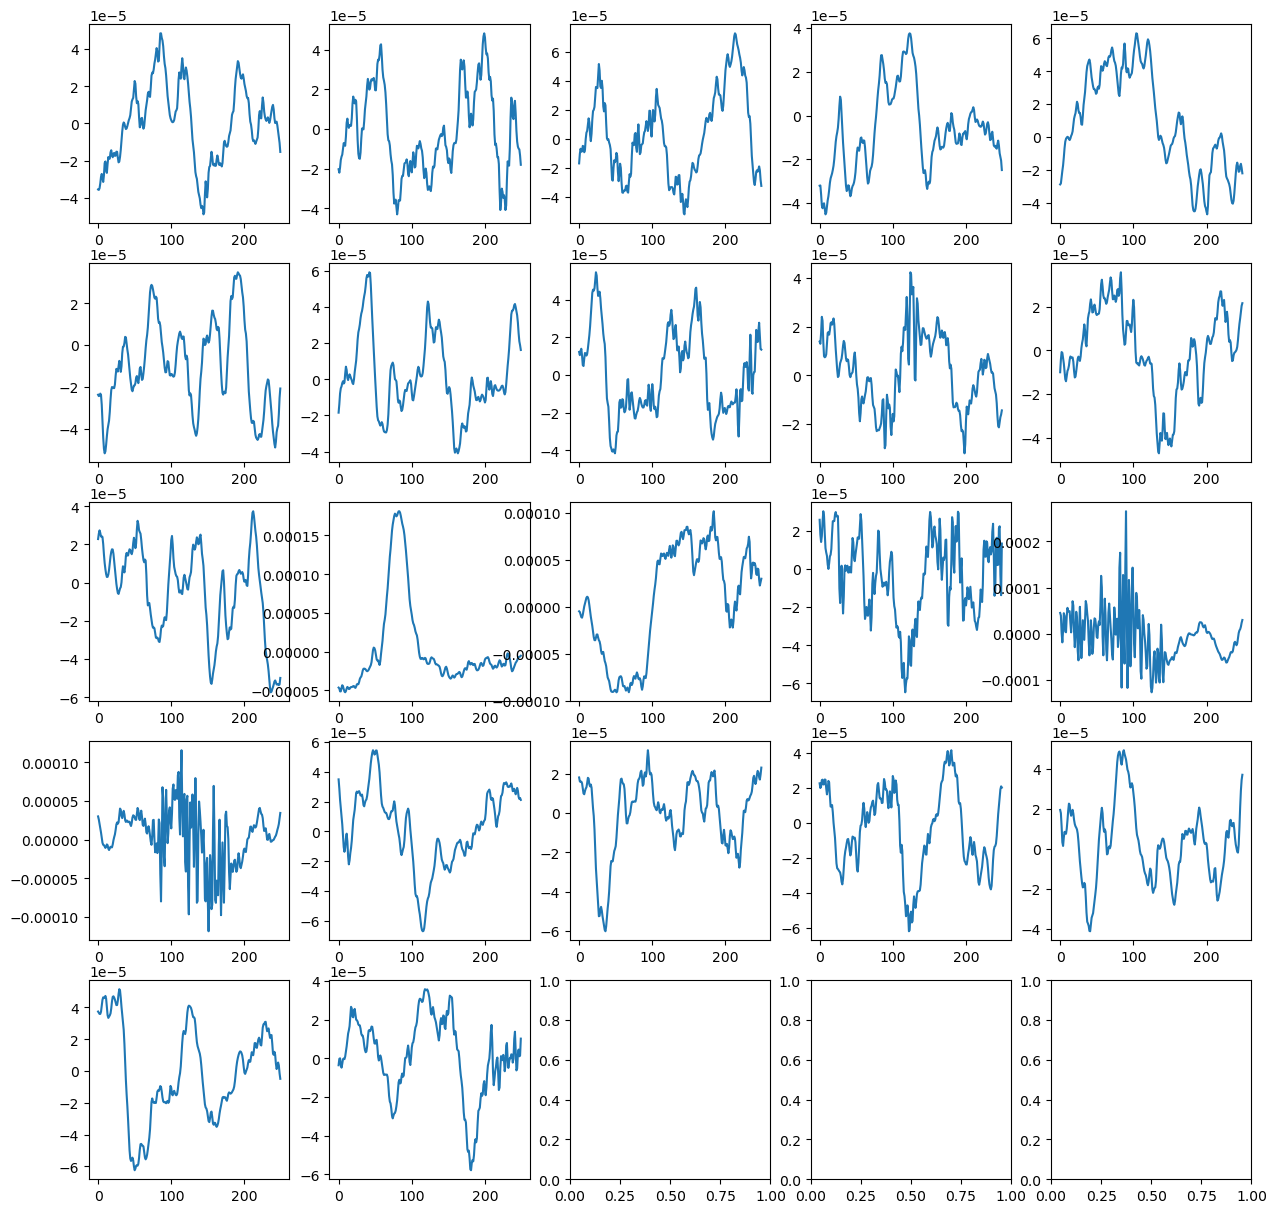

In [10]:
plot_channels(x)

Perform FFT and plot

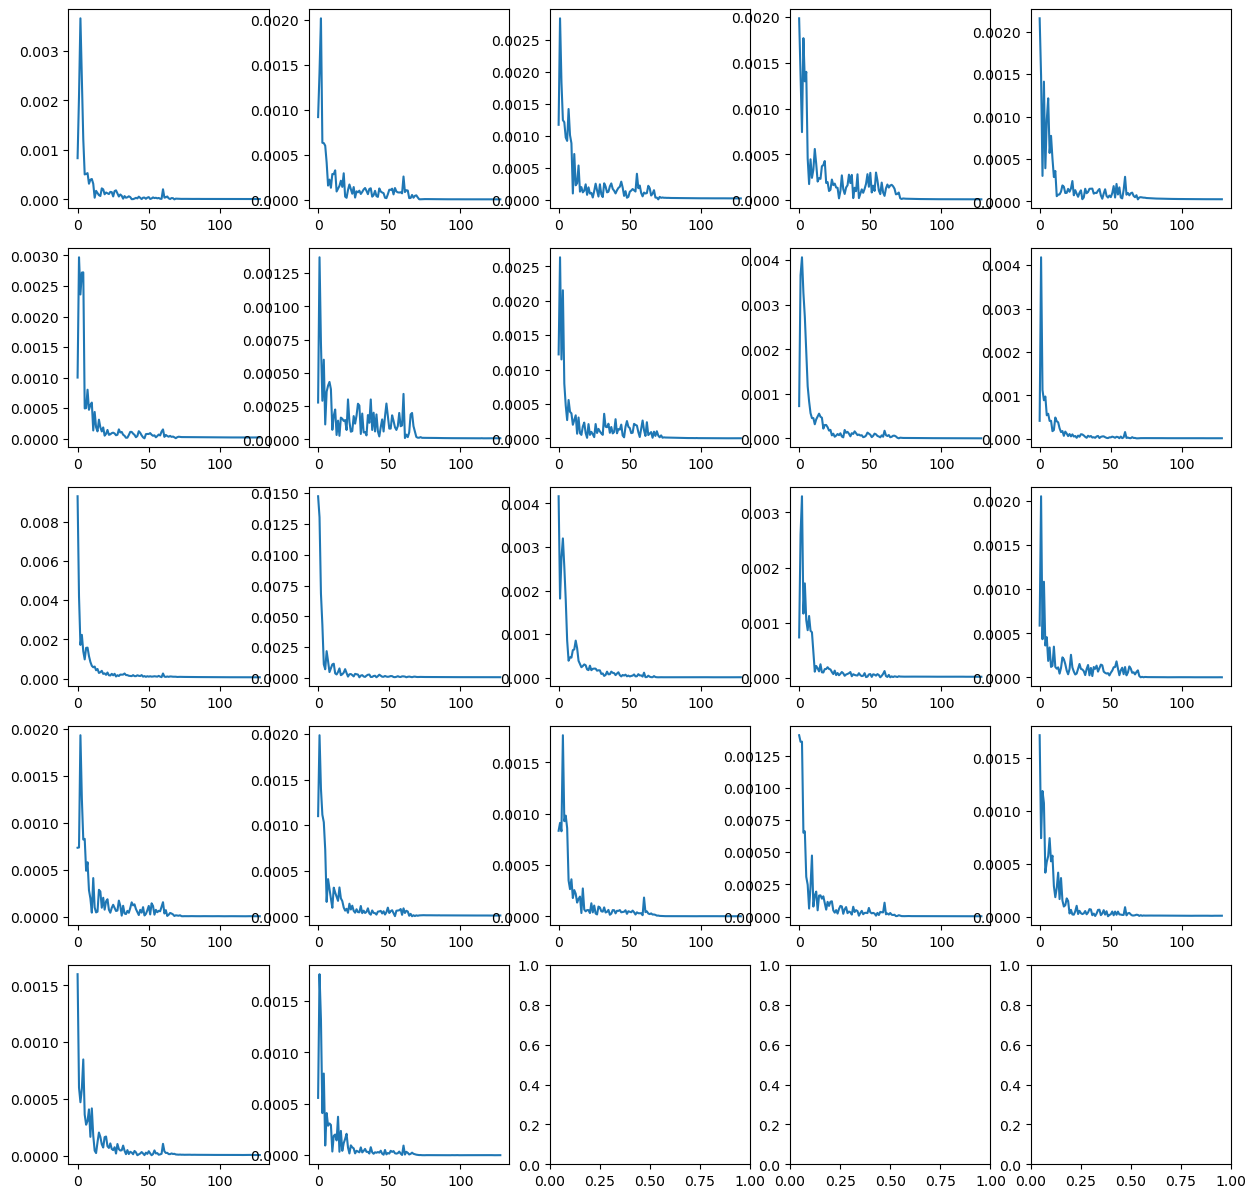

In [21]:
x_fft = np.abs(np.fft.rfft(x, axis=-1))
#x_fft = x_fft[...,10:50]
#x_fft = torch.log10(x_fft)
plot_channels(x_fft)

Extract the `Power spectral density` and plot.

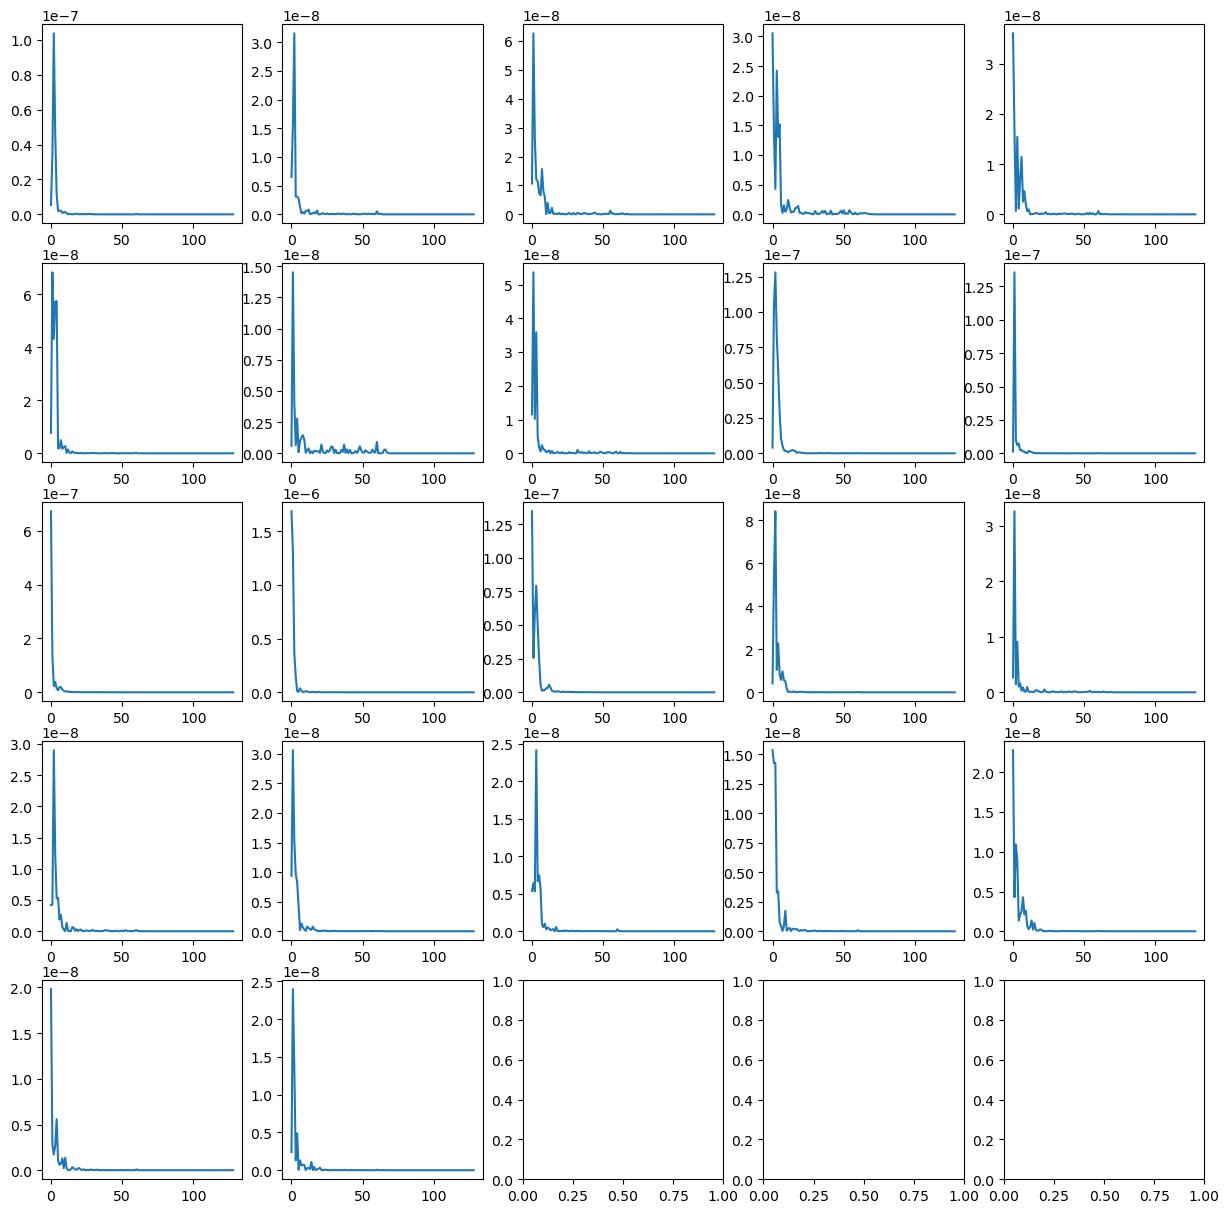

In [22]:
# Compute the power specturm of the signal
power_spectrum = x_fft**2
# Normalize the power spectrum by the number of samples in the signal
power_spectrum /= power_spectrum.shape[-1]

plot_channels(power_spectrum)

In [49]:
def psd_compute(x):
  # Compute the power specturm of the signal
  power_spectrum = x**2
  # Normalize the power spectrum by the number of samples in the signal
  power_spectrum /= power_spectrum.shape[-1]

  return power_spectrum

  #plot_channels(power_spectrum)

In [50]:
freq_range = {
            "alpha": (8, 13),
            "theta": (4, 8),
            "beta": (14, 26),
            "delta": (1, 4),
            "gamma": (30, 50),
        }
features = []

for name,freq_range in freq_range.items():
  print(freq_range)
  psd = psd_compute(x_fft[...,freq_range[0]:freq_range[1]])
          # sum the power values
  psd = psd.sum(axis=-1)
  features.append(psd)

(8, 13)
(4, 8)
(14, 26)
(1, 4)
(30, 50)


In [104]:
f = np.array(features).transpose(1,0)

In [70]:
f_log = np.log10(f)

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [96]:
scaler.fit(f)
f_n = scaler.transform(f)

In [101]:
f_n.shape

(22, 5)

In [110]:
f_n.shape

(22, 5)

In [127]:
x_mean = np.expand_dims(x.mean(axis=-1),axis=-1)
x_std = np.expand_dims(x.std(axis=-1),axis=-1)

In [129]:
np.concatenate([f_n,x_mean,x_std],axis=-1)[0]

array([1.05064642e-01, 1.40904815e-01, 3.27533358e-02, 9.70169155e-02,
       1.99788127e-02, 3.25310975e-06, 2.86777339e-05])